# Challenge Data Science - Eduardo Farías

### Resumen ejecutivo
    En el siguiente trabajo, se aborda un problema de aprendizaje supervisado, donde se requiere predecir cuándo un avión puede retrasarse dependiendo de determinadas variables dadas. Se prueban 2 modelos de clasificación de algoritmos "decision tree" y "Knn", obteniendo accuracy de sobre el 80%, pero recall de sólo sobre el 60%. Se recomienda incorporar variables tales como clima, experiencia del piloto y características mecánicas del avión que podrían mejorar el recall del modelo.

Problema
El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de
Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo que
aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:
Fecha-I : Fecha y hora programada del vuelo.

Vlo-I : Número de vuelo programado.

Ori-I : Código de ciudad de origen programado.

Des-I : Código de ciudad de destino programado.

Emp-I : Código aerolínea de vuelo programado.

Fecha-O : Fecha y hora de operación del vuelo.

Vlo-O : Número de vuelo de operación del vuelo.

Ori-O : Código de ciudad de origen de operación

Des-O : Código de ciudad de destino de operación.

Emp-O : Código aerolínea de vuelo operado.

DIA : Día del mes de operación del vuelo.

MES : Número de mes de operación del vuelo.

AÑO : Año de operación del vuelo.

DIANOM : Día de la semana de operación del vuelo.

TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.

OPERA : Nombre de aerolínea que opera.

SIGLAORI : Nombre ciudad origen.

SIGLADES : Nombre ciudad destino


Desafío
1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?
2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
○ temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
○ dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
○ atraso_15 : 1 si dif_min > 15, 0 si no.
○ periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .
3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?
4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.
Siéntete libre de generar variables adicionales y/o complementar con variables externas.
5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué
elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la
performance?


# Solución

Para comenzar hacemos importe de las librerías que utilizaremos en el problema planteado

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier #librería para arbol de clasificaciones
from sklearn.preprocessing import OrdinalEncoder #librería para pasar variables ordinales a numéricas
import datetime #Librería para trabajar variables de formato tiempo
from sklearn.preprocessing import LabelEncoder #Librería para pasar variables cualitativas a numéricas
from sklearn.preprocessing import StandardScaler #Librería para estandarizar valores 
from sklearn.neighbors import KNeighborsClassifier # librerías para crear modelos de KNN
from sklearn.model_selection import cross_val_predict, cross_val_score # Librerías para crear modelos de KNN
from sklearn.metrics import plot_roc_curve #Para roc_auc
from sklearn.metrics import confusion_matrix # Para matriz de confusión
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report #Para analizar recall y precisión
from sklearn.metrics import precision_recall_curve #Para curva de precisión vs recall
from sklearn.metrics import roc_auc_score #Para roc_auc

A continuación hacemos importe del data frame

In [8]:
path = 'https://raw.githubusercontent.com/edofarias/Challenge-Data-Scientist/master/dataset_SCL.csv'
df = pd.read_csv(path, sep=",",low_memory=False)
print (df.shape)
df.head(10)

(68206, 18)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami
6,2017-01-07 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 23:25:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami
7,2017-01-08 23:30:00,226,SCEL,KMIA,AAL,2017-01-08 23:25:00,226,SCEL,KMIA,AAL,8,1,2017,Domingo,I,American Airlines,Santiago,Miami
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,10,1,2017,Martes,I,American Airlines,Santiago,Miami
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,12,1,2017,Jueves,I,American Airlines,Santiago,Miami


# 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

In [9]:
df.dtypes #Análizamos formato de los datos

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

Pasamos las fechas a tipo datetime, 
la variable Vlo-I, no la pasamos a numérica ya que es cualitativa, 
las variables DIA, AÑO y MES, las mantenemos en numérica ya que son cuatitativas discretas,
la variable DIANOM es una variable cualitativa ordinal.
El resto de variables son cualitativas nominales.

In [10]:
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])

In [11]:
# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[["Lunes", "Martes", 
                                      "Miercoles", "Jueves", "Viernes", 
                                      "Sabado", "Domingo"]])
# Ajustamos el codificador con la variable DIANOM y la transformamos
encoder.fit(df[["DIANOM"]])
df["DIANOM"] = encoder.transform(df[["DIANOM"]])

In [12]:
df.head(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,6.0,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,0.0,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,1.0,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,2.0,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,3.0,I,American Airlines,Santiago,Miami
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,7,1,2017,5.0,I,American Airlines,Santiago,Miami
6,2017-01-07 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 23:25:00,226,SCEL,KMIA,AAL,7,1,2017,5.0,I,American Airlines,Santiago,Miami
7,2017-01-08 23:30:00,226,SCEL,KMIA,AAL,2017-01-08 23:25:00,226,SCEL,KMIA,AAL,8,1,2017,6.0,I,American Airlines,Santiago,Miami
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,10,1,2017,1.0,I,American Airlines,Santiago,Miami
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,12,1,2017,3.0,I,American Airlines,Santiago,Miami


In [383]:
df.dtypes #Formatos luegos de los cambios realizados

Fecha-I      datetime64[ns]
Vlo-I                object
Ori-I                object
Des-I                object
Emp-I                object
Fecha-O      datetime64[ns]
Vlo-O                object
Ori-O                object
Des-O                object
Emp-O                object
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM              float64
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
dtype: object

Ahora que tenemos a todas las variables en su clase correcta para poder trabajarla, utilizamos describe para ver como se distribuye la data.

In [384]:
df.describe(include='all') #Vemos principales características de los datos


<ipython-input-384-c96207043bd5>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all') #Vemos principales características de los datos
<ipython-input-384-c96207043bd5>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all') #Vemos principales características de los datos


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
count,68206,68206,68206,68206,68206,68206,68205,68206,68206,68206,68206.000000,68206.000000,68206.000000,68206.000000,68206,68206,68206,68206
unique,53252,584,1,64,30,62774,861,1,63,32,NaN,NaN,NaN,NaN,2,23,1,62
top,2017-03-19 18:00:00,174,SCEL,SCFA,LAN,2017-05-19 07:01:00,174,SCEL,SCFA,LAN,NaN,NaN,NaN,NaN,N,Grupo LATAM,Santiago,Buenos Aires
freq,6,686,68206,5787,37611,5,649,68206,5786,20988,NaN,NaN,NaN,NaN,36966,40892,68206,6335
first,2017-01-01 00:15:00,NaN,NaN,NaN,NaN,2017-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-12-31 23:55:00,NaN,NaN,NaN,NaN,2018-01-01 00:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.714790,6.622585,2017.000029,2.955209,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.782886,3.523321,0.005415,1.994333,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,2017.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,3.000000,2017.000000,1.000000,NaN,NaN,NaN,NaN


Al analizar la información se puede apreciar que el rango de Fecha-I es exclusivamente en el 2017 y la Fecha-O tiene un máximo en el 2018, que fueron sólo los últimos vuelos del 2017, por lo que la variable AÑO, se podría eliminar ya que prácticamente tiene sólo un valor.

Luego, la variable VLO-I, La variable VLo-O y la variable SIGLAORI, también tienen un único valor, que también sabemos que representan a SCL.

Luego, las variables Ori-I y Ori-O son diferentes, lo que quiere decir que aunque hubo programado 64 destinos, sólo se voló hacia 63. A su vez, en "SIGLADES" que nos dice el nombre de la ciudad de destino, hay 62, lo que quiere decir que hay 2 códigos de ORI-O que están repetidos, o sea 2 ciudades con el mismo nombre pero distinto código. Para el análisis consideraría el valor del código ya que tiene más información.

Además, la variable EMP-O son 2 más que las EMP-I lo que dice que volaron 2 aerolineas más de las inicialmente planificadas.

Por otra parte, la variable "OPERA" tiene sólo 23 valores, cuando era esperable que tuviera los mismos que "EMP-O". Esto nos dice de eventual falta o hay valores repetidos en esta columna.

Respecto al resto de las variables cuantitativas tanto día, díanom y mes,tienen su mediana muy cercana a su media, por lo que son compartamientos de binomial simétrica.

In [385]:
df.isna().sum(axis = 0)

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

tenemos una fila con un valor en blanco, por lo que para continuar con un análisis limpio, borramos esa fila

In [386]:
df = df.dropna()

In [387]:
df.count()

Fecha-I      68205
Vlo-I        68205
Ori-I        68205
Des-I        68205
Emp-I        68205
Fecha-O      68205
Vlo-O        68205
Ori-O        68205
Des-O        68205
Emp-O        68205
DIA          68205
MES          68205
AÑO          68205
DIANOM       68205
TIPOVUELO    68205
OPERA        68205
SIGLAORI     68205
SIGLADES     68205
dtype: int64

Se puede observar que bajamos de 68206 a 68205 en todos las columnas.
Al ver que no eran valores que faltaban en OPERA, quiere decir que hay valores repetidos, por lo tanto la variable EMP-O es más confiable al ser código único.

# 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
○ temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
○ dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
○ atraso_15 : 1 si dif_min > 15, 0 si no.
○ periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .

In [388]:
# A continuación definimos df_exp como el df con las columnas nuevas que deseamos exportar
df_exp = df

In [389]:
#separamos datetime en date y time para facilitar cálculos
df_exp['Dates'] = pd.to_datetime(df_exp['Fecha-I']).dt.date
df_exp['Time'] = pd.to_datetime(df_exp['Fecha-I']).dt.time

In [390]:
#A continuación creamos una lista auxiliar para generar la columna temporada_alta
alta = []

In [391]:
for row in df['Dates']:
        if row >= datetime.date(2017,12, 15)  :    alta.append(1)
        elif row <= datetime.date(2017,3, 3):   alta.append(1)
        elif row >= datetime.date(2017,7,15) and row<datetime.date(2017,8,1) : alta.append(1)
        elif row >= datetime.date(2017,9,11) and row<datetime.date(2017,10,1) : alta.append(1)
       
        else :  alta.append(0)

In [392]:
#Agregamos columna temporada_alta según lo solicitado
df_exp["temporada_alta"] = alta

In [393]:
#Agregamos columna diferencia de minutos
df_exp['dif_min'] = (df_exp['Fecha-O'] - df_exp['Fecha-I'])/np.timedelta64(1,'D')*1440


In [394]:
#Para cálculos posteriores, consideraremos que cuando la diferencia previamente planteada es negativa, entonces el atraso es 0.
diferencia = []
for row in df_exp['dif_min']:
    if row<0 : diferencia.append(0)
    else: diferencia.append(row)

In [395]:
#columna dif_min modificada con valores negativos iguales a 0
df_exp['dif_min'] = diferencia

In [396]:
# creamos lista auxiliar para Agregar columna atraso
atraso = []
for row in df_exp['dif_min']:
    if row>15 : atraso.append(1)
    else : atraso.append(0)


In [397]:
#Agregamos columna atraso_15
df_exp['atraso_15'] = atraso

In [398]:
# Creamos lista auxiliar para Agregar columna período_día
periodo = []
for row in df_exp['Time']:
    if row >datetime.time(0,0,0) and row <datetime.time(5,0,0) : periodo.append("noche")
    elif row >=datetime.time(5,0,0) and  row < datetime.time(12,0,0) : periodo.append("mañana")
    elif row >=datetime.time(12,0,0) and row < datetime.time(19,0,0) : periodo.append("tarde")
    else :  periodo.append("noche")

In [399]:
#Agregamos columna periodo_dia
df_exp['periodo_dia'] = periodo

In [400]:
df_exp.head(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Dates,Time,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,2017-01-01,23:30:00,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,2017-01-02,23:30:00,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,2017-01-03,23:30:00,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,2017-01-04,23:30:00,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,2017-01-05,23:30:00,1,0.0,0,noche
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,2017-01-06,23:30:00,1,34.0,1,noche
6,2017-01-07 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 23:25:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,2017-01-07,23:30:00,1,0.0,0,noche
7,2017-01-08 23:30:00,226,SCEL,KMIA,AAL,2017-01-08 23:25:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,2017-01-08,23:30:00,1,0.0,0,noche
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,2017-01-09,23:30:00,1,40.0,1,noche
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,2017-01-11,23:30:00,1,69.0,1,noche


A continuación exportamos archivo synthetic_features.csv

In [401]:
df_exp.to_csv('synthetic_features.csv', index=False, encoding='utf-8')

# 3 ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

Dentro de las variables que tenemos, esperaría que las que más afecten sea línea que opera el vuelo y lugar de destino, ya que es una variable que está asociada a la distancia. 
Por otro lado, debería influir otras variables que no tenemos en el DF, como clima, experiencia del piloto, tipo de avión, entre otras variables.


Para ver cómo se comporta el atraso respecto a las distintas variables, se realiza tablas de frecuencia con sus respectivos gráficos.

In [402]:
#Destino
df_destino = df_exp.groupby(['SIGLADES', 'Des-O']).agg({"dif_min": "mean",'Vlo-I' : 'count',  'atraso_15': 'sum'} )
#Aquí obtenemos el atraso promedio, la cantidad de vuelos y la cantidad de atrasos por mes.
#Renombramos las columnas, creamos variable de tasa de atraso y ordenamos por tasa de atraso
df_destino.rename({'dif_min': 'atraso promedio','Vlo-I': 'cantidad de vuelos', 'atraso_15': 'cantidad de atrasos'}, axis=1, inplace=True)
df_destino['porcentaje de atraso'] = df_destino ['cantidad de atrasos']/df_destino['cantidad de vuelos']
df_destino.sort_values(by=['porcentaje de atraso'], ascending=False)

,,atraso promedio,cantidad de vuelos,cantidad de atrasos,porcentaje de atraso
SIGLADES,Des-O,,,,
Cochabamba,SLCB,113.000000,1,1,1.000000
Quito,SEQM,52.000000,2,2,1.000000
Puerto Stanley,EGYP,50.000000,1,1,1.000000
Ushuia,SAWH,24.500000,6,4,0.666667
Sydney,YSSY,27.134021,194,113,0.582474
...,...,...,...,...,...
Houston,KIAH,3.724551,334,17,0.050898
"Curitiba, Bra.",SBCT,2.000000,3,0,0.000000
Cataratas Iguacu,SBFI,2.500000,2,0,0.000000


In [403]:
#Aerolínea
df_aerolinea = df_exp.groupby(['OPERA', 'Emp-O']).agg({"dif_min": "mean",'Vlo-I' : 'count',  'atraso_15': 'sum'} )
#Aquí obtenemos el atraso promedio, la cantidad de vuelos y la cantidad de atrasos por aerolínea.

In [404]:
#Renombramos las columnas, creamos variable de tasa de atraso y ordenamos por tasa de atraso
df_aerolinea.rename({'OPERA': 'Nombre aerolinea', 'Emp-O': 'Codigo aerolinea', 'dif_min': 'atraso promedio','Vlo-I': 'cantidad de vuelos', 'atraso_15': 'cantidad de atrasos'}, axis=1, inplace=True)
df_aerolinea['porcentaje de atraso'] = df_aerolinea ['cantidad de atrasos']/df_aerolinea['cantidad de vuelos']
df_aerolinea.sort_values(by=['porcentaje de atraso'], ascending=False)


,,atraso promedio,cantidad de vuelos,cantidad de atrasos,porcentaje de atraso
OPERA,Emp-O,,,,
Avianca,TPU,118.000000,2,2,1.000000
Latin American Wings,56R,39.937500,16,11,0.687500
Plus Ultra Lineas Aereas,PUE,32.306122,49,30,0.612245
Qantas Airways,QFA,27.020513,195,113,0.579487
Air Canada,ACA,23.837168,565,258,0.456637
Latin American Wings,JMR,25.569520,1647,668,0.405586
Aerolineas Argentinas,AUT,39.800000,5,2,0.400000
Gol Trans,GLO,14.893300,806,287,0.356079
Grupo LATAM,DSM,17.397566,493,167,0.338742


In [405]:
#Mes
df_mes = df_exp.groupby(['MES']).agg({"dif_min": "mean",'Vlo-I' : 'count',  'atraso_15': 'sum'} )
#Aquí obtenemos el atraso promedio, la cantidad de vuelos y la cantidad de atrasos por mes.
#Renombramos las columnas, creamos variable de tasa de atraso y ordenamos por tasa de atraso
df_mes.rename({'dif_min': 'atraso promedio','Vlo-I': 'cantidad de vuelos', 'atraso_15': 'cantidad de atrasos'}, axis=1, inplace=True)
df_mes['porcentaje de atraso'] = df_mes ['cantidad de atrasos']/df_mes['cantidad de vuelos']
df_mes.sort_values(by=['porcentaje de atraso'], ascending=False)

,atraso promedio,cantidad de vuelos,cantidad de atrasos,porcentaje de atraso
MES,,,,
7,16.045895,5992,1758,0.293391
12,12.645532,6356,1615,0.254091
10,12.231432,6032,1363,0.225962
11,10.287500,6080,1199,0.197204
8,9.622563,5744,996,0.173398
9,9.606595,5610,967,0.172371
6,9.632805,4981,852,0.171050
1,8.748977,6107,978,0.160144
5,8.595420,5240,827,0.157824


In [406]:
#día de la semana
df_dia = df_exp.groupby(['DIANOM']).agg({"dif_min": "mean",'Vlo-I' : 'count',  'atraso_15': 'sum'} )
#Aquí obtenemos el atraso promedio, la cantidad de vuelos y la cantidad de atrasos por dia de la semana.
#Renombramos las columnas, creamos variable de tasa de atraso y ordenamos por tasa de atraso
df_dia.rename({'dif_min': 'atraso promedio','Vlo-I': 'cantidad de vuelos', 'atraso_15': 'cantidad de atrasos'}, axis=1, inplace=True)
df_dia['porcentaje de atraso'] = df_dia ['cantidad de atrasos']/df_dia['cantidad de vuelos']
df_dia.sort_values(by=['porcentaje de atraso'], ascending=False)

,atraso promedio,cantidad de vuelos,cantidad de atrasos,porcentaje de atraso
DIANOM,,,,
4.0,11.691022,10292,2285,0.222017
0.0,10.982924,10131,2048,0.202152
3.0,10.450341,10250,2045,0.199512
2.0,9.553281,9722,1661,0.170850
1.0,9.398882,9662,1634,0.169116
5.0,9.484914,8352,1363,0.163194
6.0,9.017762,9796,1578,0.161086


In [407]:
#temporada
df_temporada = df_exp.groupby(['temporada_alta']).agg({"dif_min": "mean",'Vlo-I' : 'count',  'atraso_15': 'sum'} )
#Aquí obtenemos el atraso promedio, la cantidad de vuelos y la cantidad de atrasos por dia de la semana.
#Renombramos las columnas, creamos variable de tasa de atraso y ordenamos por tasa de atraso
df_temporada.rename({'dif_min': 'atraso promedio','Vlo-I': 'cantidad de vuelos', 'atraso_15': 'cantidad de atrasos'}, axis=1, inplace=True)
df_temporada['porcentaje de atraso'] = df_temporada ['cantidad de atrasos']/df_temporada['cantidad de vuelos']
df_temporada.sort_values(by=['porcentaje de atraso'], ascending=False)

,atraso promedio,cantidad de vuelos,cantidad de atrasos,porcentaje de atraso
temporada_alta,,,,
1,10.646281,22761,4470,0.196389
0,9.850211,45444,8144,0.179210


In [408]:
#tipo de vuelo
df_tipo = df_exp.groupby(['TIPOVUELO']).agg({"dif_min": "mean",'Vlo-I' : 'count',  'atraso_15': 'sum'} )
#Aquí obtenemos el atraso promedio, la cantidad de vuelos y la cantidad de atrasos por dia de la semana.
#Renombramos las columnas, creamos variable de tasa de atraso y ordenamos por tasa de atraso
df_tipo.rename({'dif_min': 'atraso promedio','Vlo-I': 'cantidad de vuelos', 'atraso_15': 'cantidad de atrasos'}, axis=1, inplace=True)
df_tipo['porcentaje de atraso'] = df_tipo ['cantidad de atrasos']/df_tipo['cantidad de vuelos']
df_tipo.sort_values(by=['porcentaje de atraso'], ascending=False)

,atraso promedio,cantidad de vuelos,cantidad de atrasos,porcentaje de atraso
TIPOVUELO,,,,
I,11.943052,31239,7048,0.225615
N,8.571769,36966,5566,0.150571


Se puede apreciar que los rangos más amplios de porcentaje de atraso se encuentran en Destino y operación del vuelo, que va entre 0-100% según como cambia la variable.
Respecto a los meses del año, su rango va entre 11% y 29%. donde diciembre y julio son los meses que más hay atrasos, lo cual coincide con que ambos pertenecen a meses de temporada alta. No obstante, enero y febrero, que también pertenecen a temporada alta, no tienen el mismo comportamiento, haciendo que la diferencia se atenúa en la variable temporada_alta
Respecto a los días de la semana, su rango va entre 16% y 22% siendo una de las variables que menos influye, siendo viernes (4) y lunes (0) los que más influyen.
Por último, respecto a los tipos de vuelo, se tiene que el rango va entre 15% y 23%, donde se ve una ligera tendencia a que cuando son vuelos internacionales hay más probabilidad de atraso, esto es esperable ya que son vuelos más largos.

# 4 Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

Lo primero es detectar la variable independiente, que en este caso es 'atraso_15'.
Luego, eliminamos las variables que no entregan valor, previamente analizadas, tales como las que tienen valor único a lo largo de la columna, o que son una descripción de otra columna.

In [409]:
#generamos una copia del df_exp para trabajarlo en los modelos
df_mod = df_exp

In [410]:
#Eliminamos columnas redundantes
df_mod = df_mod.drop(['Fecha-I', 'Ori-I', 'Fecha-O', 'Ori-O', 'AÑO', 'OPERA', 'SIGLAORI','SIGLADES', 'Dates', 'dif_min'], axis=1)
#Fecha-I, Date y Fecha-O se eliminan porque su diferencia es la variable independiente, y la Fecha O ya está como información en DIA y MES
#Ori-I y Ori-O se eliminan porque es un único valor
#Año se elimina porque es un único valor
#OPERA, SIGLAORI, SIGLADES se elimina porque sólo es la descripción de otra columna
#dif_min se elimina para quedarnos sólo con una variable independiente

In [411]:
#A continuación agregamos variables que podrían ayudar como cambio de aerolínea y cambio de destino
df_mod['cambio aerolinea'] = np.where(df_mod['Emp-I']== df_mod['Emp-O'], 'NO', 'SI')
df_mod['cambio destino'] = np.where(df_mod['Des-I']== df_mod['Des-O'], 'NO', 'SI')
df_mod['cambio no vuelo'] = np.where(df_mod['Vlo-I']== df_mod['Vlo-O'], 'NO', 'SI')


In [412]:
df_mod['Time']=df_mod['Time'].astype(str).str[:2]
df_mod['Time'] = pd.to_numeric(df_mod['Time'])

In [413]:
df_mod.head(10)

,Vlo-I,Des-I,Emp-I,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,Time,temporada_alta,atraso_15,periodo_dia,cambio aerolinea,cambio destino,cambio no vuelo
0,226,KMIA,AAL,226,KMIA,AAL,1,1,6.0,I,23,1,0,noche,NO,NO,NO
1,226,KMIA,AAL,226,KMIA,AAL,2,1,0.0,I,23,1,0,noche,NO,NO,NO
2,226,KMIA,AAL,226,KMIA,AAL,3,1,1.0,I,23,1,0,noche,NO,NO,NO
3,226,KMIA,AAL,226,KMIA,AAL,4,1,2.0,I,23,1,0,noche,NO,NO,NO
4,226,KMIA,AAL,226,KMIA,AAL,5,1,3.0,I,23,1,0,noche,NO,NO,NO
5,226,KMIA,AAL,226,KMIA,AAL,7,1,5.0,I,23,1,1,noche,NO,NO,NO
6,226,KMIA,AAL,226,KMIA,AAL,7,1,5.0,I,23,1,0,noche,NO,NO,NO
7,226,KMIA,AAL,226,KMIA,AAL,8,1,6.0,I,23,1,0,noche,NO,NO,NO
8,226,KMIA,AAL,226,KMIA,AAL,10,1,1.0,I,23,1,1,noche,NO,NO,NO
9,226,KMIA,AAL,226,KMIA,AAL,12,1,3.0,I,23,1,1,noche,NO,NO,NO


In [414]:
#A continuación damos valor numérico a las variables categóricas
le = LabelEncoder()
df_mod['Vlo-I'] = le.fit_transform(df_mod['Vlo-I'])
df_mod['Des-I'] = le.fit_transform(df_mod['Des-I'])
df_mod['Emp-I'] = le.fit_transform(df_mod['Emp-I'])
df_mod['Vlo-O'] = le.fit_transform(df_mod['Vlo-O'])
df_mod['Des-O'] = le.fit_transform(df_mod['Des-O'])
df_mod['Emp-O'] = le.fit_transform(df_mod['Emp-O'])
df_mod['TIPOVUELO'] = le.fit_transform(df_mod['TIPOVUELO'])
df_mod['periodo_dia'] = le.fit_transform(df_mod['periodo_dia'])
df_mod['cambio aerolinea'] = le.fit_transform(df_mod['cambio aerolinea'])
df_mod['cambio destino'] = le.fit_transform(df_mod['cambio destino'])
df_mod['cambio no vuelo'] = le.fit_transform(df_mod['cambio no vuelo'])
df_mod.head()

,Vlo-I,Des-I,Emp-I,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,Time,temporada_alta,atraso_15,periodo_dia,cambio aerolinea,cambio destino,cambio no vuelo
0,219,9,0,318,10,2,1,1,6.0,0,23,1,0,1,0,0,0
1,219,9,0,318,10,2,2,1,0.0,0,23,1,0,1,0,0,0
2,219,9,0,318,10,2,3,1,1.0,0,23,1,0,1,0,0,0
3,219,9,0,318,10,2,4,1,2.0,0,23,1,0,1,0,0,0
4,219,9,0,318,10,2,5,1,3.0,0,23,1,0,1,0,0,0


In [415]:
df_mod.describe()

,Vlo-I,Des-I,Emp-I,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,Time,temporada_alta,atraso_15,periodo_dia,cambio aerolinea,cambio destino,cambio no vuelo
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,298.620541,36.237900,18.267898,444.310930,36.339579,21.051946,15.714742,6.622667,2.955209,0.541984,12.461271,0.333715,0.184942,1.002273,0.273704,0.000411,0.066241
std,141.185732,13.966456,6.616996,223.419308,13.456547,6.451416,8.782941,3.523281,1.994348,0.498238,5.801049,0.471543,0.388254,0.863513,0.445862,0.020257,0.248706
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.000000,31.000000,17.000000,255.000000,31.000000,19.000000,8.000000,3.000000,1.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,299.000000,38.000000,17.000000,443.000000,38.000000,22.000000,16.000000,7.000000,3.000000,1.000000,13.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,417.000000,46.000000,27.000000,644.000000,46.000000,28.000000,23.000000,10.000000,5.000000,1.000000,17.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
max,583.000000,63.000000,29.000000,860.000000,62.000000,31.000000,31.000000,12.000000,6.000000,1.000000,23.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


In [416]:
#Se observa que nunca hay cambio de vuelo, por lo tanto se borra la columna
df_mod = df_mod.drop(['cambio no vuelo'], axis=1)

In [417]:
df_mod["atraso_15"].value_counts() #Cantidad de observaciones a predecir por cada clase

0    55591
1    12614
Name: atraso_15, dtype: int64

In [418]:
#Movemos columna independiente atraso_15 al final del DF
df_mod['atraso'] = df_mod['atraso_15']
df_mod = df_mod.drop(['atraso_15'], axis=1)

In [419]:
df_mod.head()

,Vlo-I,Des-I,Emp-I,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,Time,temporada_alta,periodo_dia,cambio aerolinea,cambio destino,atraso
0,219,9,0,318,10,2,1,1,6.0,0,23,1,1,0,0,0
1,219,9,0,318,10,2,2,1,0.0,0,23,1,1,0,0,0
2,219,9,0,318,10,2,3,1,1.0,0,23,1,1,0,0,0
3,219,9,0,318,10,2,4,1,2.0,0,23,1,1,0,0,0
4,219,9,0,318,10,2,5,1,3.0,0,23,1,1,0,0,0


A continuación escalamos las variables independientes, para eso apartamos la variable dependiente, y después de escalar la volvemos a anexar.

In [420]:
scaler = StandardScaler()
scaled = scaler.fit(df_mod.iloc[:,0:-1]).transform(df_mod.iloc[:,0:-1])

In [421]:
#dfs es el df_mod pero escalado
dfs = pd.DataFrame(scaled, columns=df_mod.columns[:-1])
dfs.head()

,Vlo-I,Des-I,Emp-I,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,Time,temporada_alta,periodo_dia,cambio aerolinea,cambio destino
0,-0.563946,-1.950251,-2.760774,-0.565358,-1.957395,-2.953163,-1.675390,-1.595873,1.526722,-1.087809,1.816707,1.413001,-0.002632,-0.613881,-0.020266
1,-0.563946,-1.950251,-2.760774,-0.565358,-1.957395,-2.953163,-1.561532,-1.595873,-1.481803,-1.087809,1.816707,1.413001,-0.002632,-0.613881,-0.020266
2,-0.563946,-1.950251,-2.760774,-0.565358,-1.957395,-2.953163,-1.447674,-1.595873,-0.980382,-1.087809,1.816707,1.413001,-0.002632,-0.613881,-0.020266
3,-0.563946,-1.950251,-2.760774,-0.565358,-1.957395,-2.953163,-1.333816,-1.595873,-0.478961,-1.087809,1.816707,1.413001,-0.002632,-0.613881,-0.020266
4,-0.563946,-1.950251,-2.760774,-0.565358,-1.957395,-2.953163,-1.219958,-1.595873,0.022459,-1.087809,1.816707,1.413001,-0.002632,-0.613881,-0.020266


In [422]:
dfs = pd.concat([dfs, df_mod["atraso"]], axis=1) #Concatenamos las variables X con la variable Y en un DF
dfs.head()

,Vlo-I,Des-I,Emp-I,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,Time,temporada_alta,periodo_dia,cambio aerolinea,cambio destino,atraso
0,-0.563946,-1.950251,-2.760774,-0.565358,-1.957395,-2.953163,-1.675390,-1.595873,1.526722,-1.087809,1.816707,1.413001,-0.002632,-0.613881,-0.020266,0.0
1,-0.563946,-1.950251,-2.760774,-0.565358,-1.957395,-2.953163,-1.561532,-1.595873,-1.481803,-1.087809,1.816707,1.413001,-0.002632,-0.613881,-0.020266,0.0
2,-0.563946,-1.950251,-2.760774,-0.565358,-1.957395,-2.953163,-1.447674,-1.595873,-0.980382,-1.087809,1.816707,1.413001,-0.002632,-0.613881,-0.020266,0.0
3,-0.563946,-1.950251,-2.760774,-0.565358,-1.957395,-2.953163,-1.333816,-1.595873,-0.478961,-1.087809,1.816707,1.413001,-0.002632,-0.613881,-0.020266,0.0
4,-0.563946,-1.950251,-2.760774,-0.565358,-1.957395,-2.953163,-1.219958,-1.595873,0.022459,-1.087809,1.816707,1.413001,-0.002632,-0.613881,-0.020266,0.0


In [423]:
np.sum(dfs.isnull()) #chequeamos que no hayan valores nulos

Vlo-I               1
Des-I               1
Emp-I               1
Vlo-O               1
Des-O               1
Emp-O               1
DIA                 1
MES                 1
DIANOM              1
TIPOVUELO           1
Time                1
temporada_alta      1
periodo_dia         1
cambio aerolinea    1
cambio destino      1
atraso              1
dtype: int64

In [424]:
dfs = dfs.dropna() #Eliminamos las filas con valores nulos

In [425]:
#Matriz de correlaciones
corrMatrix = dfs.corr() #Genereamos una matriz de correlaciones entre todas las variables
corrMatrix.style.background_gradient(cmap='coolwarm')

,Vlo-I,Des-I,Emp-I,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,Time,temporada_alta,periodo_dia,cambio aerolinea,cambio destino,atraso
Vlo-I,1.000000,-0.109433,0.024911,0.996141,-0.114162,-0.012045,0.000036,-0.014514,0.031504,-0.470891,0.001168,0.022046,0.023921,-0.104635,0.000172,0.066519
Des-I,-0.109433,1.000000,0.320690,-0.107871,0.999695,0.408684,0.000506,-0.007406,-0.015638,0.358138,-0.145104,0.009370,-0.017102,0.311193,-0.002573,0.001874
Emp-I,0.024911,0.320690,1.000000,0.031406,0.323214,0.920249,0.002543,0.002036,-0.000335,0.292660,-0.017216,0.012410,0.011761,-0.108151,0.004649,0.011082
Vlo-O,0.996141,-0.107871,0.031406,1.000000,-0.112567,-0.007730,-0.000147,-0.010084,0.032121,-0.475624,0.001436,0.019595,0.023217,-0.109503,-0.010340,0.066105
Des-O,-0.114162,0.999695,0.323214,-0.112567,1.000000,0.412110,0.000481,-0.007227,-0.015609,0.363590,-0.145990,0.009266,-0.017293,0.314022,-0.001156,0.001951
Emp-O,-0.012045,0.408684,0.920249,-0.007730,0.412110,1.000000,0.001058,-0.013547,-0.000735,0.437346,0.000356,0.013926,0.023787,0.177689,0.001856,-0.020505
DIA,0.000036,0.000506,0.002543,-0.000147,0.000481,0.001058,1.000000,0.014339,-0.011165,0.001290,-0.001292,0.192888,0.002247,-0.004100,-0.005605,0.003461
MES,-0.014514,-0.007406,0.002036,-0.010084,-0.007227,-0.013547,0.014339,1.000000,0.007944,0.011514,-0.012514,-0.294079,0.007580,-0.007279,-0.001322,0.083537
DIANOM,0.031504,-0.015638,-0.000335,0.032121,-0.015609,-0.000735,-0.011165,0.007944,1.000000,-0.029197,0.026219,0.011550,0.009484,-0.004231,-0.003900,0.013675
TIPOVUELO,-0.470891,0.358138,0.292660,-0.475624,0.363590,0.437346,0.001290,0.011514,-0.029197,1.000000,0.022360,0.001078,-0.001552,0.328474,-0.001708,-0.094720


Aquí se puede observar, que las variables de de planificación y las de operación tienen una alta correlación, lo cual era esperable ya que como vimos en las variables de cambio, ocurre en pocas situaciones.

In [426]:
#Establecemos matriz de variables predictoras y vector de variable a predecir X e Y
X = dfs.iloc[:,0:-1]
Y = dfs.iloc[:,-1]

Modelo 1

In [427]:
#Se calcula el K con mejor accuracy o precisión 
preds_list = []
score_list = []
k_list = []

for k in list(range(1, 20, 2)):
  knn_model = KNeighborsClassifier(n_neighbors=k, weights="uniform", metric="minkowski")
  preds = cross_val_predict(knn_model, X, Y, cv=3, method="predict", n_jobs=3)
  score = cross_val_score(knn_model, X, Y, cv=3, scoring="accuracy")
  k_list.append(k)
  preds_list.append(preds)
  score_list.append(score.mean())

In [428]:
df_scores = pd.DataFrame({"K":k_list, 
                   "score":score_list
                   })

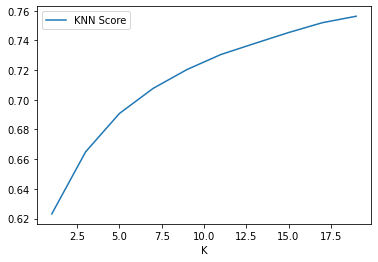

In [429]:
df_scores.set_index("K")["score"].plot(label="KNN Score")
plt.legend()
plt.show();

Aquí se puede apreciar que después de 10 cuando alcanza un KNN score de 0.81 es que después su subida es despreciable, porlo que se elige 10 para el siguiente paso

In [430]:
knn_model = KNeighborsClassifier(n_neighbors=17, weights="uniform", metric="minkowski")
preds = cross_val_predict(knn_model, X, Y, cv=3, method="predict", n_jobs=3)
score = cross_val_score(knn_model, X, Y, cv=3, scoring="accuracy", n_jobs=3)
score

array([0.76982626, 0.77835936, 0.70753057])

In [431]:
#Realizamos matriz de confusión
confusion_matrix(Y, preds)

array([[49544,  6046],
       [10875,  1739]], dtype=int64)

In [432]:
print(f"Informe de Clasificación:\n"
      f"{classification_report(Y, preds)}")

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85     55590
         1.0       0.22      0.14      0.17     12614

    accuracy                           0.75     68204
   macro avg       0.52      0.51      0.51     68204
weighted avg       0.71      0.75      0.73     68204



Según el informe se puede apreciar que para predecir cuando no habrá atraso, es muy certero, pero la precisión baja al momento de intentar predecir si efectivamente habrá un atraso.

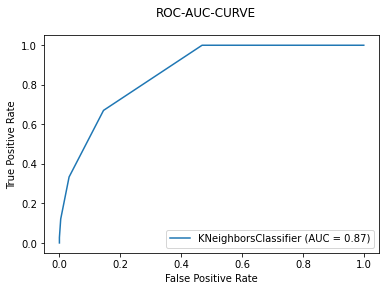

In [433]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights="uniform", metric="minkowski")
knn_model.fit(X, Y)
plot_roc_curve(knn_model,X,Y)
plt.suptitle("ROC-AUC-CURVE")
plt.show()

El AUC es 87%, que como vimos anteriormente está asociado a que la myoría de los datos son 0, y el modelo predice bien los 0, que son la mayoría de los datos, pero no los 1 que son un porcentaje menor.

In [434]:
#Hacemos una copia de el dfs que es el df_mod escalado, y que ahora haremos una baraja dfb
dfb=dfs

In [435]:
#hacemos una baraja de las observaciones
dfb = dfs.sample(frac=1.0, random_state=42)

In [436]:
#Establecemos matriz de variables predictoras y vector de variable a predecir X e Y
X = dfb.iloc[:,0:-1]
Y = dfb.iloc[:,-1]

In [437]:
#Se calcula el K con mejor accuracy o precisión 
preds_list = []
score_list = []
k_list = []

for k in list(range(1, 20, 2)):
  knn_model = KNeighborsClassifier(n_neighbors=k, weights="uniform", metric="minkowski")
  preds = cross_val_predict(knn_model, X, Y, cv=3, method="predict", n_jobs=3)
  score = cross_val_score(knn_model, X, Y, cv=3, scoring="accuracy")
  k_list.append(k)
  preds_list.append(preds)
  score_list.append(score.mean())

In [438]:
df_scores = pd.DataFrame({"K":k_list, 
                   "score":score_list
                   })

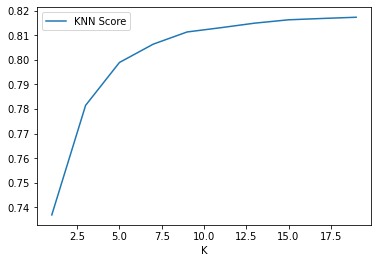

In [439]:
df_scores.set_index("K")["score"].plot(label="KNN Score")
plt.legend()
plt.show();

Aquí se puede apreciar que después de 10 cuando alcanza un KNN score de 0.81 es que después su subida es despreciable, porlo que se elige 10 para el siguiente paso

In [440]:
knn_model = KNeighborsClassifier(n_neighbors=10, weights="uniform", metric="minkowski")
preds = cross_val_predict(knn_model, X, Y, cv=3, method="predict", n_jobs=3)
score = cross_val_score(knn_model, X, Y, cv=3, scoring="accuracy", n_jobs=3)
score

array([0.81513086, 0.81583462, 0.81490279])

In [441]:
#Realizamos matriz de confusión
confusion_matrix(Y, preds)

array([[54487,  1103],
       [11495,  1119]], dtype=int64)

In [442]:
print(f"Informe de Clasificación:\n"
      f"{classification_report(Y, preds)}")

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90     55590
         1.0       0.50      0.09      0.15     12614

    accuracy                           0.82     68204
   macro avg       0.66      0.53      0.52     68204
weighted avg       0.77      0.82      0.76     68204



Según el informe se puede apreciar que para predecir cuando no habrá atraso, es muy certero, pero la precisión baja al momento de intentar predecir si efectivamente habrá un atraso.

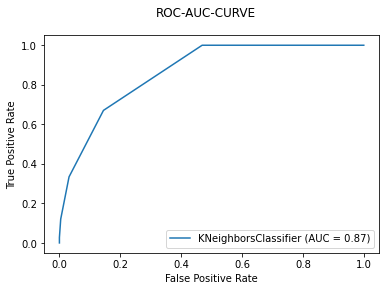

In [443]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights="uniform", metric="minkowski")
knn_model.fit(X, Y)
plot_roc_curve(knn_model,X,Y)
plt.suptitle("ROC-AUC-CURVE")
plt.show()

El AUC es 87%, que como vimos anteriormente está asociado a que la myoría de los datos son 0, y el modelo predice bien los 0, que son la mayoría de los datos, pero no los 1 que son un porcentaje menor.

Modelo 2

In [461]:
#Establecemos matriz de variables predictoras y vector de variable a predecir X e Y, recordar que df_mod es previo al escalado
df_x = dfb.iloc[:,0:-1]
df_y = dfb.iloc[:,-1]

In [462]:
df_x

,Vlo-I,Des-I,Emp-I,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,Time,temporada_alta,periodo_dia,cambio aerolinea,cambio destino
27320,0.378082,0.340969,0.110640,0.401441,0.346334,-0.628075,0.146337,-0.460559,-0.478961,0.919279,0.954787,-0.707713,1.155437,1.628981,-0.020266
57460,-1.378482,0.054567,1.319657,-1.366548,0.049078,1.076989,1.626490,1.242412,0.022459,0.919279,-0.251900,-0.707713,-1.160700,-0.613881,-0.020266
42687,0.356834,1.772982,-0.191614,0.379062,1.758296,-0.318064,-1.447674,0.390926,0.022459,-1.087809,0.265252,-0.707713,1.155437,-0.613881,-0.020266
49345,-0.457702,1.558180,-0.191614,-0.475839,1.535355,0.146954,0.601768,0.674755,0.022459,-1.087809,1.127171,1.413001,-0.002632,1.628981,-0.020266
13525,-0.818931,0.197768,1.319657,-0.847341,0.197706,1.076989,0.487911,-1.028216,-1.481803,0.919279,-0.251900,-0.707713,-1.160700,-0.613881,-0.020266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37195,0.512658,-1.234245,-0.191614,0.535719,-1.214256,-0.318064,1.740348,0.107098,-1.481803,-1.087809,0.782404,1.413001,1.155437,-0.613881,-0.020266
6266,-1.909701,-1.592248,-2.307393,-1.827568,-1.585826,-2.488146,0.943342,-1.312044,0.523880,-1.087809,1.644323,1.413001,-0.002632,-0.613881,-0.020266
54887,1.107623,-0.231836,-0.191614,1.144444,-0.248177,-0.318064,1.398774,0.958583,1.025301,-1.087809,-0.079516,-0.707713,1.155437,-0.613881,-0.020266
860,-0.174385,1.916184,1.168530,-0.202808,1.906924,0.921983,0.715626,-1.595873,1.526722,-1.087809,0.092868,1.413001,1.155437,1.628981,-0.020266


In [463]:
df_y

27320    0.0
57460    0.0
42687    1.0
49345    0.0
13525    0.0
        ... 
37195    0.0
6266     0.0
54887    0.0
860      1.0
15796    0.0
Name: atraso, Length: 68204, dtype: float64

In [464]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x.values, df_y.values, 
                                                    stratify=df_y.values, 
                                                    random_state=42, test_size=0.3 ) #aquí está seleccionado el 30% de las observaciones para test
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(47742, 15) (47742,)
(20462, 15) (20462,)


Bucle para la selección de "max_depth"

In [465]:
md_list = []
score_train_list = []
score_test_list = []

for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeClassifier(random_state=0, max_depth=maxdepth)
  tree_model.fit(X_train, y_train)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model.score(X_train, y_train))
  score_test_list.append(100.0*tree_model.score(X_test, y_test))

df = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list})

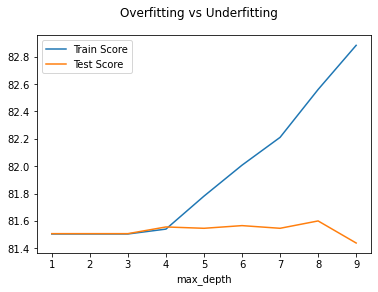

In [466]:
df.set_index("max_depth", inplace=True)
df["score_train"].plot(label="Train Score")
df["score_test"].plot(label="Test Score")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

Para 1,2 y 3 es exactamente el mismo. Luego, sigue creciendo para test y para training hasta 7, con una ligera caida en 5 para test. Por lo que se elige 7.

Entrenamiento del modelo

In [467]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=7)
tree_model.fit(X_train, y_train) #Aquí se entrena
pred_train = tree_model.predict(X_train)
pred_test = tree_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*tree_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*tree_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 82.21
Precisión sobre los datos de test: 81.55


Generación del Grafo para su análisis

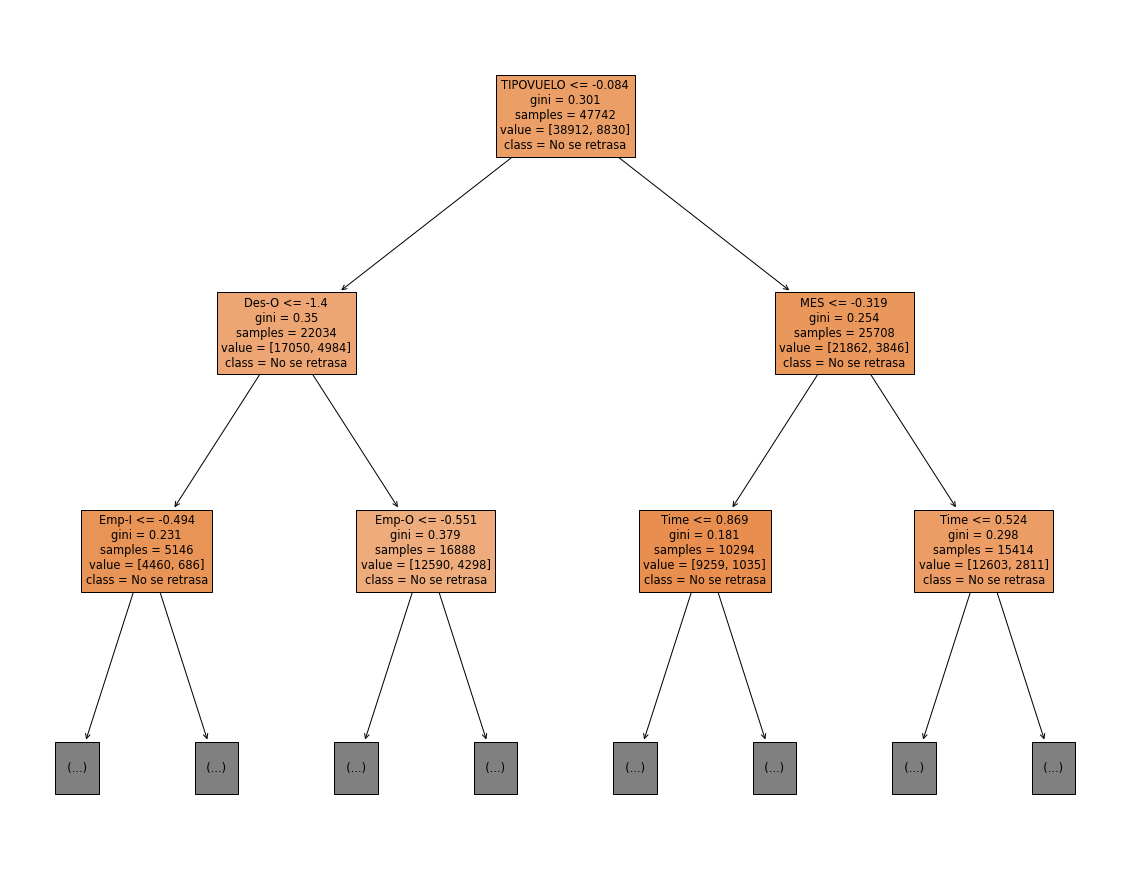

In [468]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(20,16))
plot_tree(tree_model, filled=True, max_depth=2, feature_names=df_x.columns, class_names=['No se retrasa','Se retrasa']) # Se pone 3 y no 7 acá para poder ver el grafo
plt.show()

En las siguientes figuras se puede ver lo bien que dividen a las diferentes clases las variables que han sido seleccionadas como las más importantes.

Evaluación del modelo

In [469]:
from sklearn.metrics import accuracy_score # importamos librería para medir precisión
pred_train = tree_model.predict(X_train)
pred_test = tree_model.predict(X_test)

print (100.0*accuracy_score(pred_train, y_train))
print (100.0*accuracy_score(pred_test, y_test))

82.2106321477944
81.5462809109569


Para los datos de entrenamiento se obtubo un 82% de precisión y para los datos de test se obtuvo un 82% de precisión.

Confusion matrix:



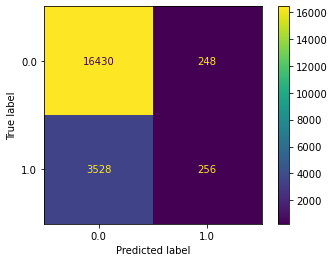

In [470]:
from sklearn.metrics import plot_confusion_matrix # importamos librería para mostrar matriz de confusión
print(f"Confusion matrix:\n")
disp = plot_confusion_matrix(tree_model, X_test, y_test)
plt.show()

 para un depth= 7 El modelo cuando debía predecir 0, la mayoría del tiempo acertó (82%), pero cuando debía predecir 1 su resultado es un poco más aleatorio (62%).

Cálculo de la Importancia de las Variables

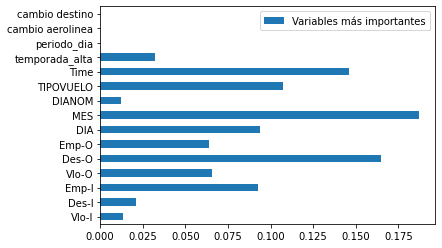

In [473]:
df_imp = pd.DataFrame(tree_model.feature_importances_.reshape(1,-1), columns=df_x.columns, index=["Variables más importantes"])
df_imp.T.plot.barh()
plt.legend()
plt.show();

# 5 Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?

El accuracy para ambos modelos seleccionados es sobre el 80%, no obstante el recall de la variable "atraso" cuando es 1, vale decir la capacidad de predecir atrasos es baja, esto se vio con la matriz de confusión, ya que muestra de manera clara cuantos casos acierta en cada clase.

Al ser un problema de aprendizaje supervisado, con una variable dependiente de 2 clases, opté por el grupo de algoritmos de clasificación, aunque en este ejercicio sólo probé 2 modelos, podría haber seguido probando otros algoritmos, pero estaba acotado por tiempo.

Las variables que más influyen en el algoritmo fueron: DES-O, MES y Time, según el tree model. Vale decir, el destino del vuelo, el mes en el que se voló y la hora en la que se voló.

Las maneras de mejorar la performance, podría ser balanceando el dataset, para aumentar de aumentar el recall a costa de tal vez empeorar el accuracy. 
Otro modo de mejorar el modelo sería integrando nuevas variables que podrían ser importantes a la hora de pensar en el retraso de un vuelo, tales como clima del día, experiencia del piloto y características mecánicas del avión.